In [1]:
#installing necessary libraries
install.packages(c("dplyr", "broom"))
library(dplyr)
library(broom)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
install.packages('stargazer')
library(stargazer)
install.packages('ggcorrplot')
library(ggcorrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘reshape2’


Loading required package: ggplot2



In [3]:
# Load the dataset
data <- read.csv("/content/kc_house_data.csv")

## EDA

In [4]:
#Getting Descriptive statistics
str(data)
head(data)
stargazer(data, type="text", median=TRUE, iqr=TRUE,digits=1, title="Descriptive Statistics")


'data.frame':	21613 obs. of  21 variables:
 $ id           : num  7.13e+09 6.41e+09 5.63e+09 2.49e+09 1.95e+09 ...
 $ date         : chr  "20141013T000000" "20141209T000000" "20150225T000000" "20141209T000000" ...
 $ price        : num  221900 538000 180000 604000 510000 ...
 $ bedrooms     : int  3 3 2 4 3 4 3 3 3 3 ...
 $ bathrooms    : num  1 2.25 1 3 2 4.5 2.25 1.5 1 2.5 ...
 $ sqft_living  : int  1180 2570 770 1960 1680 5420 1715 1060 1780 1890 ...
 $ sqft_lot     : int  5650 7242 10000 5000 8080 101930 6819 9711 7470 6560 ...
 $ floors       : num  1 2 1 1 1 1 2 1 1 2 ...
 $ waterfront   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ view         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition    : int  3 3 3 5 3 3 3 3 3 3 ...
 $ grade        : int  7 7 6 7 8 11 7 7 7 7 ...
 $ sqft_above   : int  1180 2170 770 1050 1680 3890 1715 1060 1050 1890 ...
 $ sqft_basement: int  0 400 0 910 0 1530 0 0 730 0 ...
 $ yr_built     : int  1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 ...
 $ yr_renovated :

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
,<dbl>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,⋯,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,⋯,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,⋯,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,⋯,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,⋯,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1,0,0,⋯,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930



Descriptive Statistics
Statistic       N         Mean          St. Dev.        Min      Pctl(25)       Median       Pctl(75)         Max     
----------------------------------------------------------------------------------------------------------------------
id            21,613 4,580,301,521.0 2,876,565,571.0 1,000,102 2,123,049,194 3,904,930,410 7,308,900,445 9,900,000,190
price         21,613    540,088.1       367,127.2     75,000      321,950       450,000       645,000      7,700,000  
bedrooms      21,613       3.4             0.9           0           3             3             4            33      
bathrooms     21,613       2.1             0.8          0.0         1.8           2.2           2.5           8.0     
sqft_living   21,613     2,079.9          918.4         290        1,427         1,910         2,550        13,540    
sqft_lot      21,613    15,107.0        41,420.5        520        5,040         7,618        10,688       1,651,359  
floors        21,613    

From the above results we got to know that he data set contains 21,613 observations, each carrying information on a different house feature.The average price of the houses in the sample is around 540 088 USD  with a SD of 367,127 USD . Prices range between 75,000 USD and 7,700,000 USD. Houses contain an average of 3.4 bedrooms (ranging from 0 to 33) and 2.1 bathrooms (ranging from 0 to 8).
The average square footage of living area is around 2,079.9 square feet, with a standard variation of 918.4 feet. The size of living spaces ranges from 290 to 13,540 square feet. In terms of lot size, the average is around 15,107 square feet, with a significant standard deviation of 41,420.5. Lot sizes range between 520 and 1,651,359 square feet.The average age of the houses, depending on the year constructed, is around 1971, with a standard deviation of 29.4 years. Houses in the dataset date from 1900 to 2015.

Overall, the dataset includes a wide range of dwelling features, reflecting the complexities of the real estate industry.












In [5]:
#checking for NA
 sapply(data, function(x) sum(is.na(x)))

id          date         price      bedrooms     bathrooms 
            0             0             0             0             0 
  sqft_living      sqft_lot        floors    waterfront          view 
            0             0             0             0             0 
    condition         grade    sqft_above sqft_basement      yr_built 
            0             0             0             0             0 
 yr_renovated       zipcode           lat          long sqft_living15 
            0             0             0             0             0 
   sqft_lot15 
            0

 There is no null value in our dataset

In [6]:
#check for missing values
 colSums(is.na(data))


id          date         price      bedrooms     bathrooms 
            0             0             0             0             0 
  sqft_living      sqft_lot        floors    waterfront          view 
            0             0             0             0             0 
    condition         grade    sqft_above sqft_basement      yr_built 
            0             0             0             0             0 
 yr_renovated       zipcode           lat          long sqft_living15 
            0             0             0             0             0 
   sqft_lot15 
            0

 There is no missing value in our dataset

'data.frame':	21613 obs. of  21 variables:
 $ id           : num  7.13e+09 6.41e+09 5.63e+09 2.49e+09 1.95e+09 ...
 $ date         : chr  "20141013T000000" "20141209T000000" "20150225T000000" "20141209T000000" ...
 $ price        : num  221900 538000 180000 604000 510000 ...
 $ bedrooms     : int  3 3 2 4 3 4 3 3 3 3 ...
 $ bathrooms    : num  1 2.25 1 3 2 4.5 2.25 1.5 1 2.5 ...
 $ sqft_living  : int  1180 2570 770 1960 1680 5420 1715 1060 1780 1890 ...
 $ sqft_lot     : int  5650 7242 10000 5000 8080 101930 6819 9711 7470 6560 ...
 $ floors       : num  1 2 1 1 1 1 2 1 1 2 ...
 $ waterfront   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ view         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition    : int  3 3 3 5 3 3 3 3 3 3 ...
 $ grade        : int  7 7 6 7 8 11 7 7 7 7 ...
 $ sqft_above   : int  1180 2170 770 1050 1680 3890 1715 1060 1050 1890 ...
 $ sqft_basement: int  0 400 0 910 0 1530 0 0 730 0 ...
 $ yr_built     : int  1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 ...
 $ yr_renovated :

[1] 0

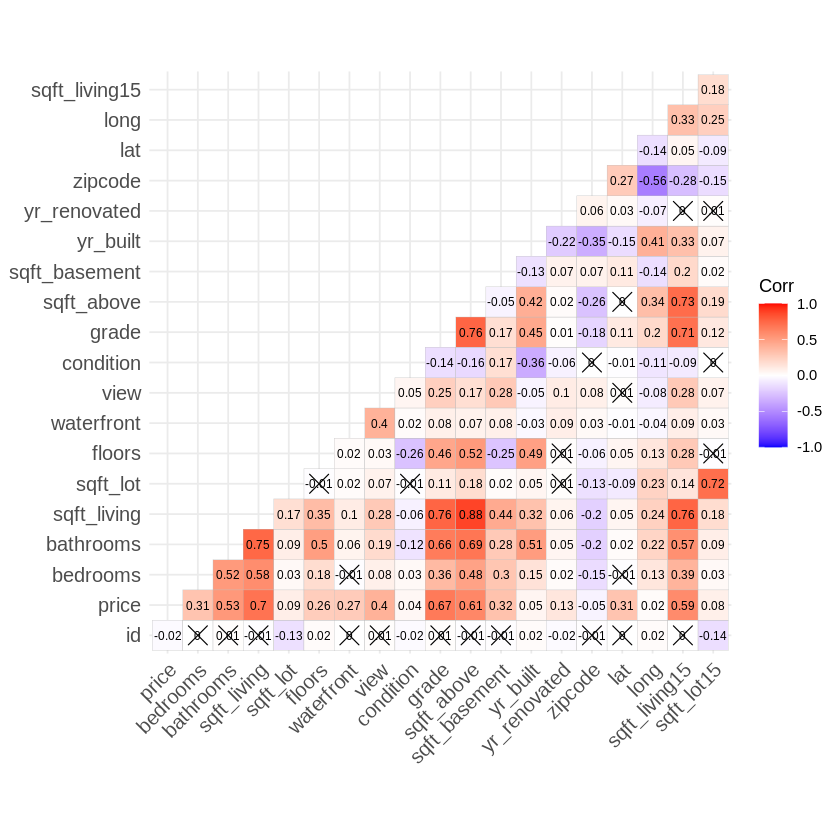

In [7]:
#Plotting heat-map to know about the co-orrelations
# Check the data types of each column
str(data)

# Remove non-numeric columns
data_numeric <- data[, sapply(data, is.numeric)]

# Convert remaining columns to numeric
data_numeric[] <- lapply(data_numeric, as.numeric)

# Check for missing values
sum(is.na(data_numeric))

# Remove rows with missing values
data_numeric <- na.omit(data_numeric)

library(ggcorrplot)
ggcorrplot(cor(data_numeric, use = "pairwise.complete.obs"),
           p.mat = cor_pmat(data_numeric),
           hc.order = FALSE, type = 'lower', lab = TRUE, lab_size = 2.5)




After displaying the heatmap we can notice that there are some columns that do not affect or not have a strong relation and can not help us in our analysis, so we are not using them in our models.These columns are 'id', 'date', 'zipcode', 'long', 'lat'.



[1] 5.1 4.1 4.1 2.1

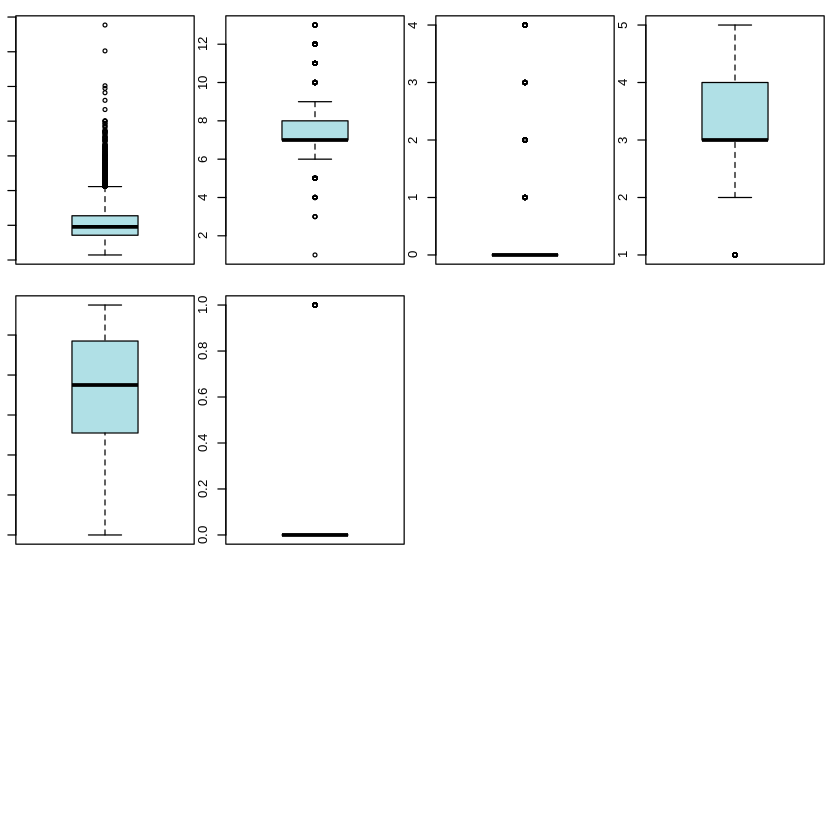

In [8]:
#Lets plot the data to see if there are any outliers

par("mar")
par(mar=c(1,1,1,1))
par(mfrow=c(3,4))

boxplot(x=data$sqft_living,xlab="Sqft_living",col=c('powderblue'))
boxplot(x=data$grade,xlab='Grade',col=c('powderblue'))
boxplot(x=data$view,xlab="View",col=c('powderblue'))
boxplot(x=data$condition,xlab='Condition',col=c('powderblue'))
boxplot(x=data$yr_built,xlab='yr_built',col=c('powderblue'))
boxplot(x=data$waterfront,xlab='Waterfront(Dummy)',col=c('powderblue'))

From the above plot, we don't find any outlier values in the variables we are interested in.
However there is an outlier value in the bedrooms dataset: A house with 33 bedrooms, 1.75 bathrooms and 1,620 sqft-living. This is an error apparently. We decided to remove this ourlier.

In [9]:
# Remove Outlier
data0 <- data[-15871,]

# Check the dimensions of the datasets
dim(data)   # Original dataset
dim(data0)  # Dataset after removing the outlier

[1] 21613    21

[1] 21612    21

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


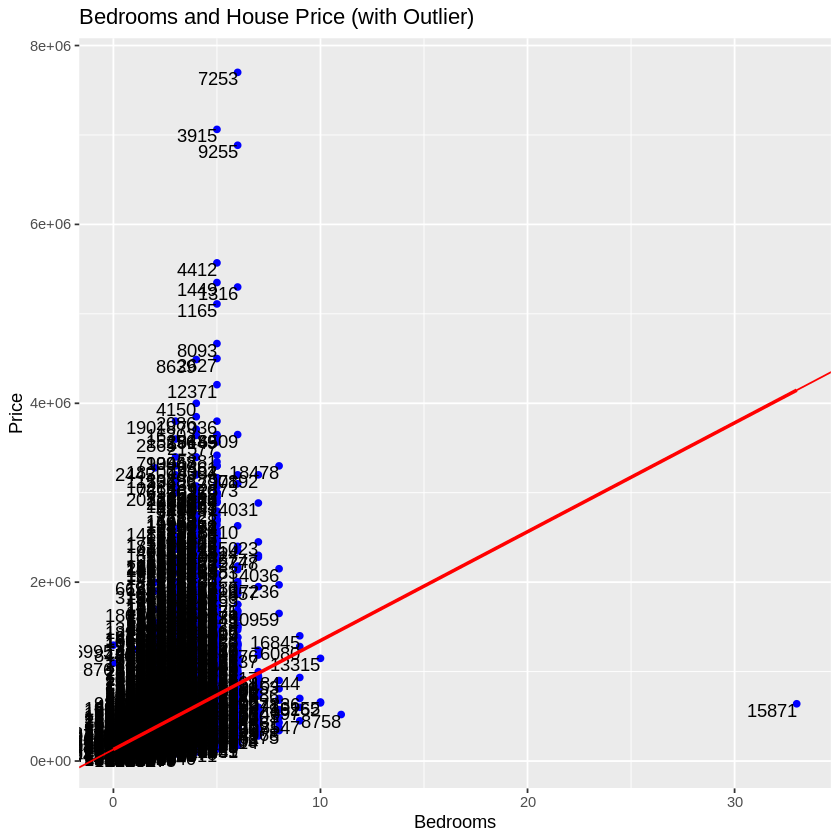

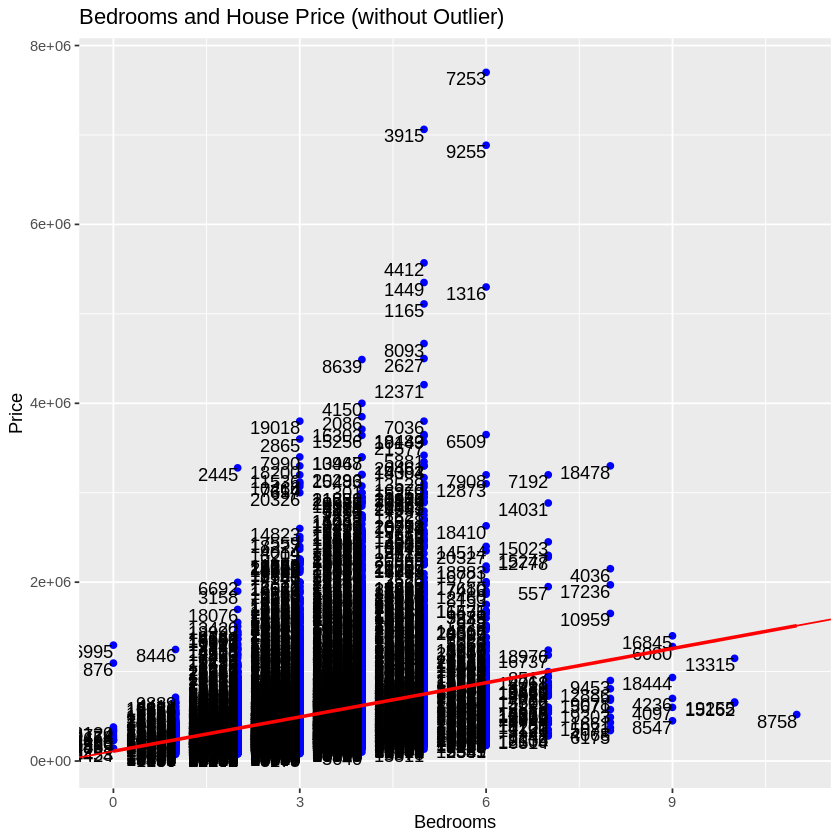

In [10]:
# For data with outlier
ggplot(data, aes(x = bedrooms, y = price)) +
  geom_point(col = "blue") +
  geom_text(aes(label = row.names(data)), hjust = 1, vjust = 1) +
  labs(title = "Bedrooms and House Price (with Outlier)", x = "Bedrooms", y = "Price") +
  stat_smooth(method = "lm", col = "red", se = FALSE) +
  geom_abline(intercept = coef(lm(price ~ bedrooms, data = data))[1], slope = coef(lm(price ~ bedrooms, data = data))[2], col = "red")

# For data without outlier
ggplot(data0, aes(x = bedrooms, y = price)) +
  geom_point(col = "blue") +
  geom_text(aes(label = row.names(data0)), hjust = 1, vjust = 1) +
  labs(title = "Bedrooms and House Price (without Outlier)", x = "Bedrooms", y = "Price") +
  stat_smooth(method = "lm", col = "red", se = FALSE) +
  geom_abline(intercept = coef(lm(price ~ bedrooms, data = data0))[1], slope = coef(lm(price ~ bedrooms, data = data0))[2], col = "red")


As we can see from the below plots comparison, after removing the outlier, the plot line fits the data better.

In [11]:
#Conducting t-tests enables us to identify variables that are statistically significant.
#We perform two t-test :
#Test 1:
#T-test of all X variables against Variable of interest-living space(sqft_living)

lapply(data[,c("bedrooms", "bathrooms", "sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated")], function(x) anova(lm(x ~ data$sqft_living)))


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
data$sqft_living,1,6216.907,6216.9068880,10767.41,0
Residuals,21611,12477.798,0.5773818,NA,NA
,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
data$sqft_living,1,7300.779,7300.7785525,28591.06,0
Residuals,21611,5518.407,0.2553518,NA,NA
,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
data$sqft_living,1,1.107496e+12,1.107496e+12,665.3663,1.561145e-144


Here, we use a series of t-tests to determine the association between each independent variable (X) and the variable of interest, sqft_living. Each t-test determines whether there is a significant difference in sqft_living at various levels of the independent variable. In the instance of bedrooms, the ANOVA result shows a very significant F value of 10767.41 with a p-value near zero. This shows that the number of bedrooms has a considerable impact on square feet of living space. Similarly, for bathrooms, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, year_built, and year_renovated, the F values are all significant with very low p-values, showing that each of these variables has a significant impact on sqft_living.

In [12]:
#Test 2:
#T-test of all X variables against Dependent Variables - price


lapply(data[,c("bedrooms", "bathrooms", "sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated")], function(x) anova(lm(x ~ data$price)))


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
data$price,1,1777.483,1777.4826727,2270.655,0
Residuals,21611,16917.222,0.7828061,NA,NA
,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
data$price,1,3535.139,3535.1391306,8228.943,0
Residuals,21611,9284.047,0.4295982,NA,NA
,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
data$price,1,2.980792e+11,298079205896,175.1403,7.972505e-40


Here, we use a series of t-tests to investigate the link between each independent variable (X) and the dependent variable (price). Each t-test determines whether there is a significant difference in price between levels of the independent variable.For example, in the case of bedrooms, the ANOVA results show a very significant F value of 2270.655 with a p-value near zero. This implies that the number of bedrooms has a major influence on price. Similarly, the F values for bathrooms, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, and yr_renovated are all significant and have very low p-values, indicating that each of these variables has a considerable impact on pricing..

In [13]:
install.packages("lubridate")
library(lubridate)
library(ggplot2)





Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




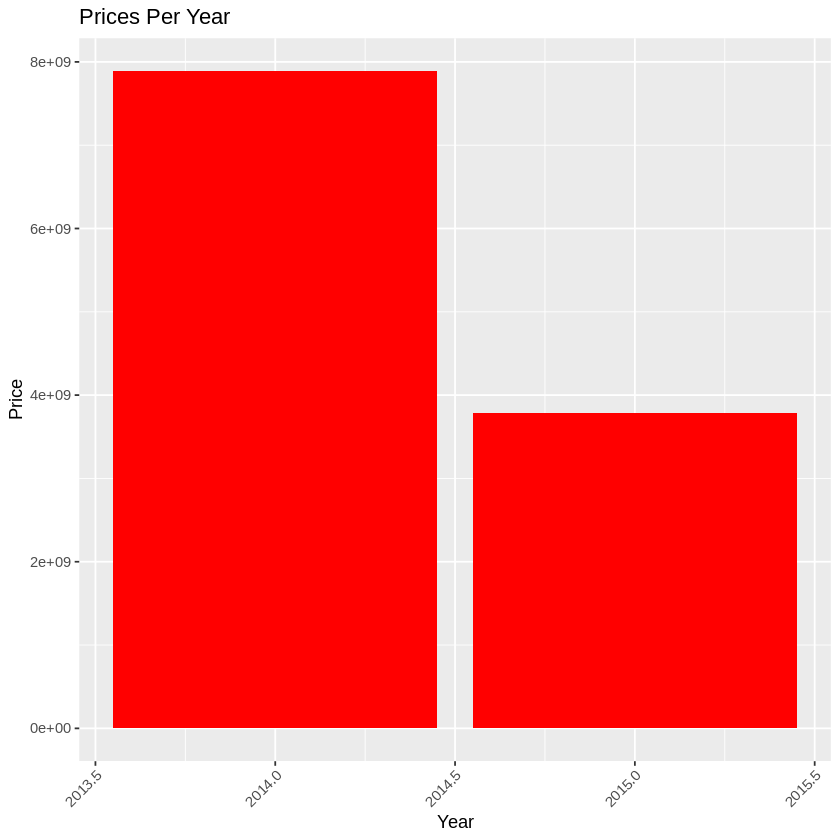

In [14]:
# Convert 'date' column to Date type
data0$DATE <- ymd(substr(data0$date, 1, 8))
# Extract years from the 'DATE' column
data0$Years <- year(data0$DATE)

# Calculate total price per year
Price_per_year <- aggregate(price ~ Years, data = data0, FUN = sum)

ggplot(Price_per_year, aes(x = Years, y = price)) +
  geom_bar(stat = "identity", fill = "red") +
  labs(x = "Year", y = "Price", title = "Prices Per Year") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


This visualization provides insights into the overall trend and dynamics of house values over time, which aids in understanding the broader context of house prices.





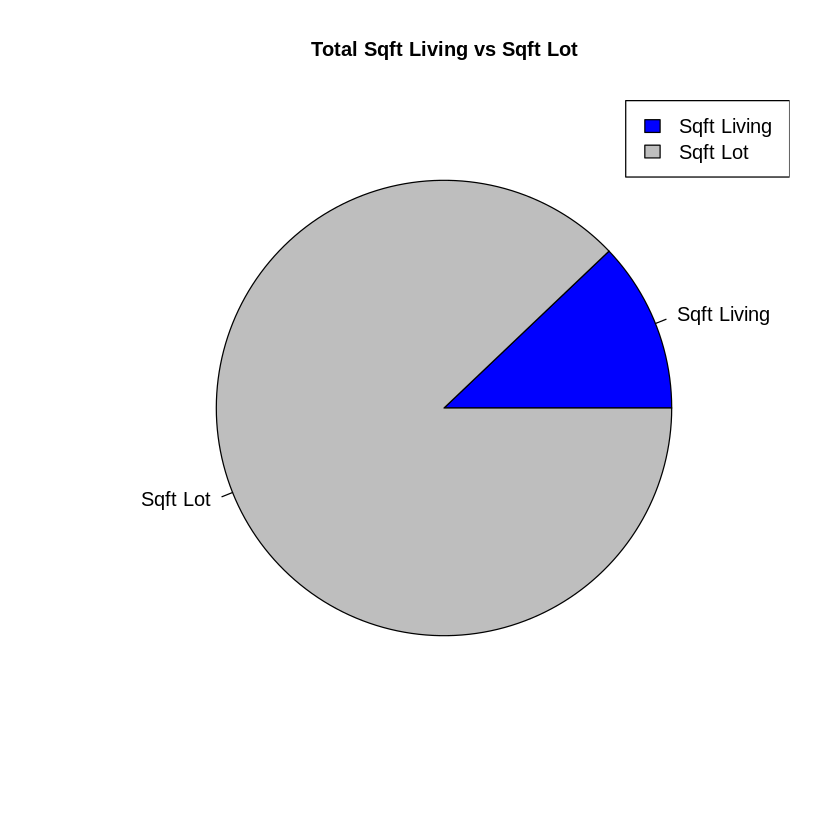

In [15]:
# Group by 'Years' and calculate the sum of 'sqft_living' and 'sqft_lot'
sqft_living_sqft_lot_per_year <- aggregate(cbind(sqft_living, sqft_lot) ~ Years, data = data0, FUN = sum)

# Calculate total sqft living and sqft lot
total_sqft_living <- sum(sqft_living_sqft_lot_per_year$sqft_living)
total_sqft_lot <- sum(sqft_living_sqft_lot_per_year$sqft_lot)

# Create a vector of sizes
sizes <- c(total_sqft_living, total_sqft_lot)


pie(sizes, labels = c('Sqft Living', 'Sqft Lot'), col = c('blue', 'grey'), main = 'Total Sqft Living vs Sqft Lot', cex.main = 1)
legend('topright', c('Sqft Living', 'Sqft Lot'), fill = c('blue', 'grey'))



The above graph helps in obtaining insights into the spatial distribution of properties in terms of living space and lot size, which can guide various decision-making processes.

## MODELING

`geom_smooth()` using formula = 'y ~ x'


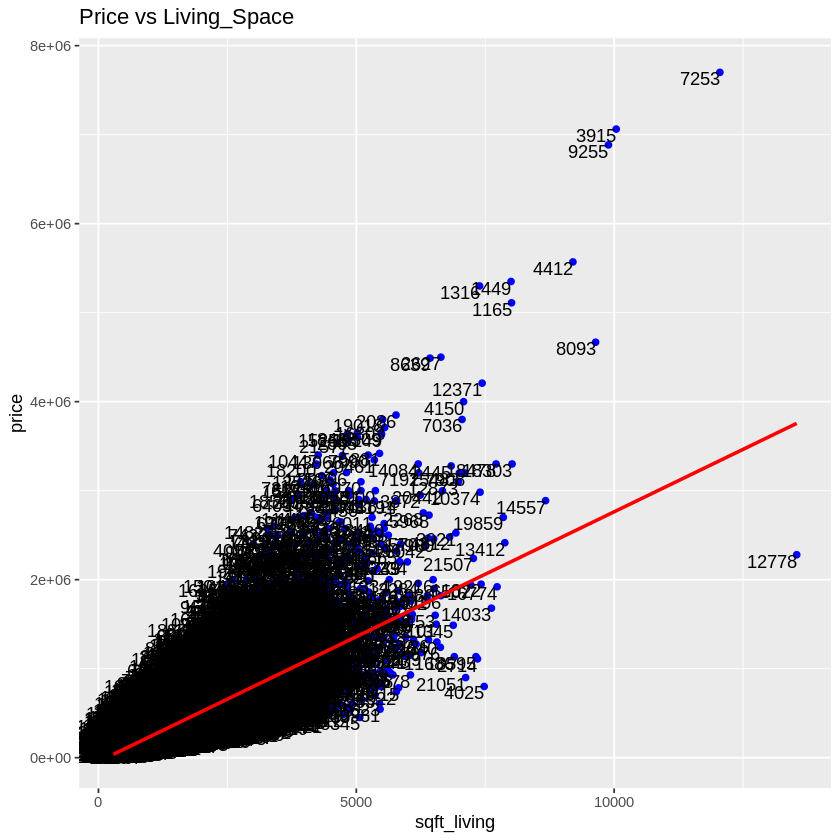

In [16]:
 #How does our Variable of Interest affect our dependent variable?

Plot_1 <- ggplot(data0, aes(x = sqft_living, y = price)) +
  geom_point(col = "blue") +
  geom_text(aes(label = row.names(data0)), hjust = 1, vjust = 1) +
  labs(title = "Price vs Living_Space", x = "sqft_living", y = "price") +
  stat_smooth(method = "lm", col = "red", se = FALSE)

print(Plot_1)


From our expectations, an increase in the square feet of living space should increase the house price.

In [17]:
cse=function(reg) {
  rob=sqrt(diag(vcovHC(reg, type="HC1")))
  return(rob)
}

l1 = lm(price~sqft_living, data=data0)
stargazer(l1, se=list(NULL),
          column.labels=c("1"),
          title="Price and Living_space", type="text",
          star.cutoffs = c(0.05,0.01,0.001), df=FALSE, digits=3)




Price and Living
                         Dependent variable:     
                    -----------------------------
                                price            
                                  1              
-------------------------------------------------
sqft_living                  280.629***          
                               (1.936)           
                                                 
Constant                   -43,603.350***        
                             (4,402.789)         
                                                 
-------------------------------------------------
Observations                   21,612            
R2                              0.493            
Adjusted R2                     0.493            
Residual Std. Error          261,454.300         
F Statistic                 21,002.300***        
Note:               *p<0.05; **p<0.01; ***p<0.001


Warning message in stat_smooth(method = "lm", col = "red", se = FALSE, col = "green"):
“Ignoring unknown parameters: `col`”
`geom_smooth()` using formula = 'y ~ x'


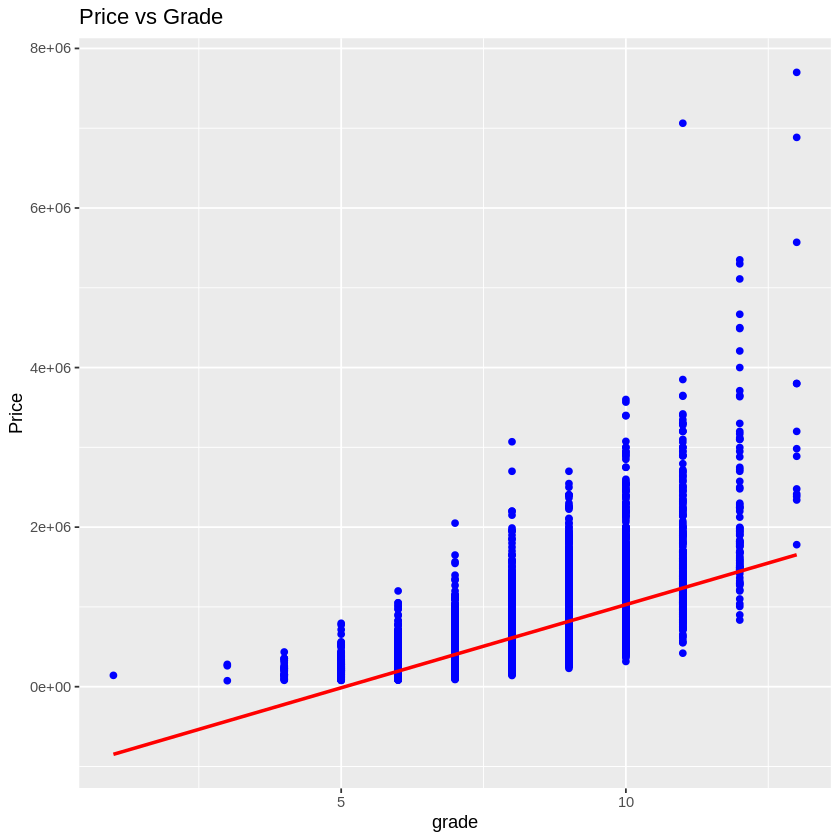

In [20]:
# In our base model, lets add some control variable

#Adding Control Variable: Grade

  Plot_2= ggplot(data0, aes(x=grade, y=price)) + geom_point(col="blue") +
  labs(title = "Price vs Grade", x = "grade", y = "Price") +
  stat_smooth(method = "lm", col = "red", se=FALSE, col = "green")

print(Plot_2)

From the plot between grade and dependent variable price above, it appears houses with higher grade tend to have higher house prices.


In [21]:
#Lets see how grade relates to sqft_living (variable of interest)
# Compute correlation between sqft_living and grade
correlation <- cor(data0$sqft_living, data0$grade)
cat("Correlation (sqft_living, grade):", correlation, "\n")

# Perform ANOVA to see how grade relates to sqft_living
anova_result <- anova(lm(sqft_living ~ grade, data = data0))
print(anova_result)




Correlation (sqft_living, grade): 0.7627015 
Analysis of Variance Table

Response: sqft_living
             Df     Sum Sq    Mean Sq F value    Pr(>F)    
grade         1 1.0605e+10 1.0605e+10   30053 < 2.2e-16 ***
Residuals 21610 7.6255e+09 3.5287e+05                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


With the anova test, we are trying to show how "Grade" relates to our variable of interest (sqft_living). The coefficient of correlation between'sqft_living' and 'grade' is around 0.76, indicating a strong positive relationship between the two variables. This shows that as a house's grade (a measure of its general quality and construction) rises, so does the square footage of the living space.  The ANOVA table provides additional support for this association. The F-value for 30053 is exceptionally high, and the p-value is nearly zero (< 2.2e-16). Simply said, the grade of the house is a very good predictor of the square footage of its living area.
In conclusion, both the correlation coefficient and the results of the ANOVA show a substantial association between'sqft_living' and 'grade', implying that higher-quality homes have larger living areas.


In [22]:
#Run Regression:

cse=function(reg) {
  rob=sqrt(diag(vcovHC(reg, type="HC1")))
  return(rob)
}

l1 = lm(price~sqft_living, data=data0)
l2 = lm(price~sqft_living+grade, data=data0)
stargazer(l1, l2, se=list(NULL, NULL),
          column.labels=c("1", "2"),
          title="Price and Grade", type="text",
          star.cutoffs = c(0.05,0.01,0.001), df=FALSE, digits=3)


Price and Grade
                         Dependent variable:      
                    ------------------------------
                                price             
                          1               2       
                         (1)             (2)      
--------------------------------------------------
sqft_living           280.629***     184.422***   
                       (1.936)         (2.869)    
                                                  
grade                               98,558.950*** 
                                     (2,241.335)  
                                                  
Constant            -43,603.350*** -598,157.000***
                     (4,402.789)    (13,297.900)  
                                                  
--------------------------------------------------
Observations            21,612         21,612     
R2                      0.493           0.535     
Adjusted R2             0.493           0.534     
Residual Std. 

`geom_smooth()` using formula = 'y ~ x'


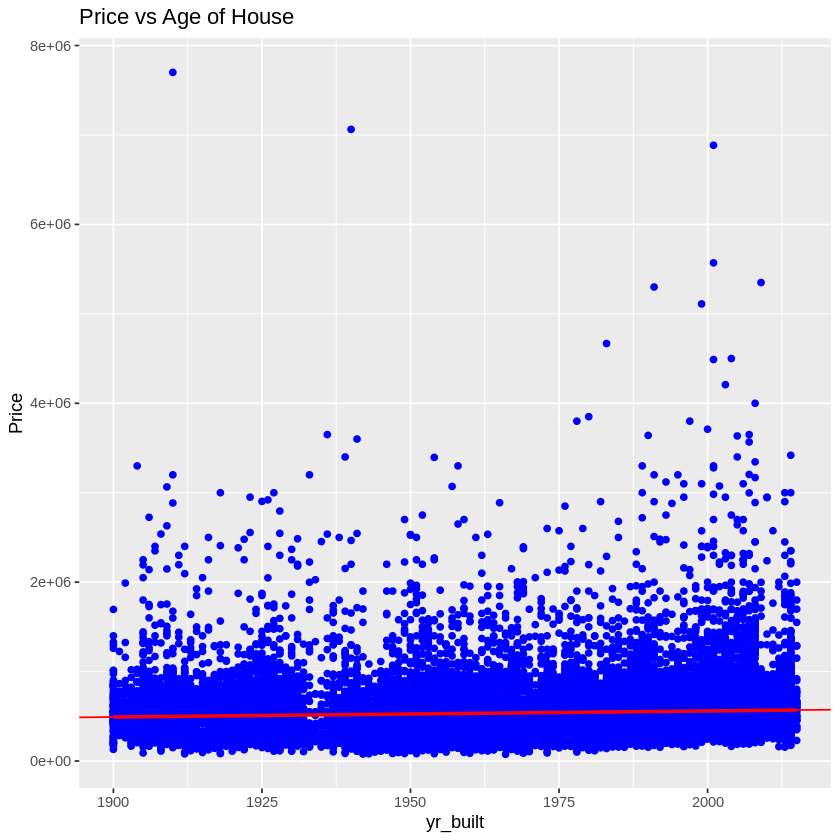

In [23]:
#Adding Control Variable:Age of House (yr_built)
#Plot Price vs Age of House with a linear regression line
Plot_3 <- ggplot(data0, aes(x = yr_built, y = price)) +
  geom_point(col = "blue") +
  labs(title = "Price vs Age of House", x = "yr_built", y = "Price") +
  stat_smooth(method = "lm", col = "red", se = FALSE) +
  geom_abline(intercept = coef(lm(price ~ yr_built, data = data0))[1],
              slope = coef(lm(price ~ yr_built, data = data0))[2], col = "red")

print(Plot_3)



From the plot between yr_built and dependent variable price, it appears houses built in more recent years tend to have higher house prices.


In [24]:
##Lets see how yr_built relates to sqft_living (variable of interest).

cor(data0$sqft_living, data0$yr_built)
anova(lm(sqft_living ~ yr_built, data=data0))



[1] 0.3180366

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
yr_built,1,1843938922,1843938921.9,2431.758,0
Residuals,21610,16386299482,758273.9,NA,NA


The correlation coefficient between'sqft_living' and 'yr_built' is around 0.318, indicating a moderately positive relationship between the variables. This shows that later-built houses have greater living spaces, however the association is not very significant. This link is further supported by the ANOVA results, which show a significant F value of 2431.758 and a very low p-value near to zero. This provides strong evidence against the null hypothesis, implying that the year a house was built has a considerable influence on its living space. The sum of squares associated with the 'yr_built' variable is 1843938922, showing the variation in'sqft_living' explained by the year of construction, whereas the residuals' total of squares is 16386299482, reflecting the unexplained variation in'sqft_living'.Overall, these findings imply that a house's age, as measured by its year of construction, has a considerable impact on its living space.

In [25]:
#Run Regression:

cse=function(reg) {
  rob=sqrt(diag(vcovHC(reg, type="HC1")))
  return(rob)
}

l1 = lm(price~sqft_living, data=data0)
l2 = lm(price~sqft_living+grade, data=data0)
l3 = lm(price~sqft_living+grade+yr_built, data=data0)
stargazer(l1, l2, l3,se=list(NULL, NULL, NULL),
          column.labels=c("1", "2", "3"),
          title="Price and Living_spce", type="text",
          star.cutoffs = c(0.05,0.01,0.001), df=FALSE, digits=3)


Price and Living
                                  Dependent variable:              
                    -----------------------------------------------
                                         price                     
                          1               2               3        
                         (1)             (2)             (3)       
-------------------------------------------------------------------
sqft_living           280.629***     184.422***       178.033***   
                       (1.936)         (2.869)         (2.652)     
                                                                   
grade                               98,558.950***   143,206.800*** 
                                     (2,241.335)     (2,195.776)   
                                                                   
yr_built                                            -3,656.630***  
                                                       (59.943)    
                              

`geom_smooth()` using formula = 'y ~ x'


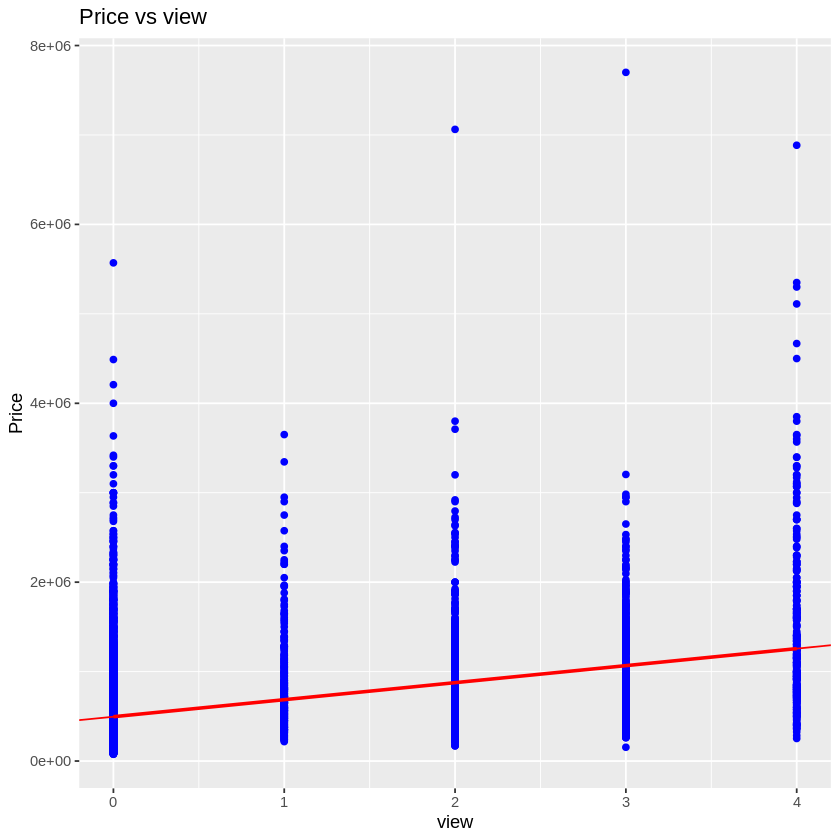

In [26]:
#Adding Control Variable:View


    Plot_4<-ggplot(data0, aes(x=view, y=price)) + geom_point(col="blue") +
    labs(title = "Price vs view", x = "view", y = "Price") +
    stat_smooth(method = "lm", col = "red", se=FALSE,)+geom_abline(intercept = coef(lm(price ~ view, data = data0))[1],
              slope = coef(lm(price ~ view, data = data0))[2], col = "red")

    print(Plot_4)




From the plot between View and dependent variable price, it appears the house with a greater number of views will have a higher price.


In [27]:
 #Lets see how view relates to sqft_living (variable of interest).
cor(data0$sqft_living, data0$view)
anova(lm(sqft_living ~ view, data=data0))



[1] 0.2846064

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
view,1,1476663620,1476663620.2,1904.71,0
Residuals,21610,16753574784,775269.5,NA,NA


The results show a significant F value of 1904.71 and a p-value close to zero, indicating that the variable view is significantly linked with sqft_living.

In [28]:
   ##Run Regression:

  cse=function(reg) {
    rob=sqrt(diag(vcovHC(reg, type="HC1")))
    return(rob)
  }

  l1 = lm(price~sqft_living, data=data0)
  l2 = lm(price~sqft_living+grade, data=data0)
  l3 = lm(price~sqft_living+grade+yr_built, data=data0)
  l4 = lm(price~sqft_living+grade+yr_built+view, data=data0)

  stargazer(l1, l2, l3,l4,se=list(NULL, NULL, NULL, NULL),
            column.labels=c("1", "2", "3", "4"),
            title="Price and View", type="text",
            star.cutoffs = c(0.05,0.01,0.001), df=FALSE, digits=3)


Price and View
                                          Dependent variable:                       
                    ----------------------------------------------------------------
                                                 price                              
                          1               2               3                4        
                         (1)             (2)             (3)              (4)       
------------------------------------------------------------------------------------
sqft_living           280.629***     184.422***       178.033***       164.694***   
                       (1.936)         (2.869)         (2.652)          (2.604)     
                                                                                    
grade                               98,558.950***   143,206.800***   134,315.600*** 
                                     (2,241.335)     (2,195.776)      (2,148.447)   
                                                 

`geom_smooth()` using formula = 'y ~ x'


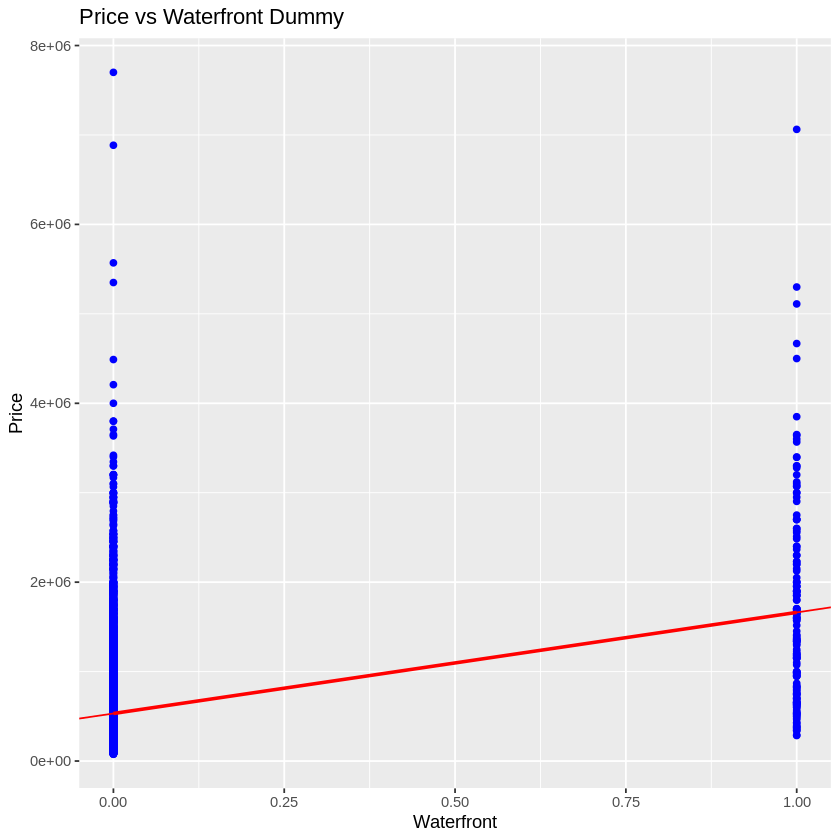

In [29]:
#Adding Control Variable: Waterfront Dummy
#Change Waterfront to dummy variable
data0$waterfront <- ifelse(data0$waterfront != 0, 1, 0)

# Fit linear regression model
model <- lm(price ~ waterfront, data = data0)


Plot_5 <- ggplot(data0, aes(x = waterfront, y = price)) +
  geom_point(col = "blue") +
  labs(title = "Price vs Waterfront Dummy", x = "Waterfront", y = "Price") +
  stat_smooth(method = "lm", col = "red", se = FALSE) +
  geom_abline(slope = coef(model)["waterfront"], intercept = coef(model)[1], col = "red")

print(Plot_5)





From the plot between Waterfront Dummy and dependent variable price, it appears the house with waterfront will have a higher price.

In [30]:
  #Lets see how waterfront dummy relates to sqft_living (variable of interest).
    cor(data0$sqft_living, data0$waterfront)
    anova(lm(sqft_living ~ waterfront, data=data0))



[1] 0.1038164

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
waterfront,1,196482752,196482751.8,235.4469,7.351563e-53
Residuals,21610,18033755652,834509.7,NA,NA


The correlation coefficient between sqft_living and the waterfront dummy variable is about 0.1038. This implies a small positive association between sqft_living and waterfront, implying that properties on the waterfront may have a slightly larger living space than those not on the waterfront. The ANOVA findings indicate a statistically significant link between sqft_living and the waterfront dummy variable. The F-value of 235.45 suggests that the variance in sqft_living explained by the waterfront variable is significantly greater than what could be predicted by chance alone. Furthermore, the p-value (7.35e-53), which is smaller than the standard significance level of 0.05, provides strong evidence against the null hypothesis that there is no association between sqft_living and waterfront.

In [31]:
  ## Run regression:

    cse=function(reg) {
      rob=sqrt(diag(vcovHC(reg, type="HC1")))
      return(rob)
    }
    l1 = lm(price~sqft_living, data=data0)
    l2 = lm(price~sqft_living+grade, data=data0)
    l3 = lm(price~sqft_living+grade+yr_built, data=data0)
    l4 = lm(price~sqft_living+grade+yr_built+view, data=data0)
    l5 = lm(price~sqft_living+grade+yr_built+view+waterfront, data=data0)

    stargazer(l1, l2, l3,l4,l5, se=list(NULL, NULL, NULL, NULL, NULL),
              column.labels=c("1", "2", "3", "4", "5"),
              title="Price and Condition", type="text",
              star.cutoffs = c(0.05,0.01,0.001), df=FALSE, digits=3)


Price and Condition
                                                   Dependent variable:                               
                    ---------------------------------------------------------------------------------
                                                          price                                      
                          1               2               3                4                5        
                         (1)             (2)             (3)              (4)              (5)       
-----------------------------------------------------------------------------------------------------
sqft_living           280.629***     184.422***       178.033***       164.694***       164.293***   
                       (1.936)         (2.869)         (2.652)          (2.604)          (2.546)     
                                                                                                     
grade                               98,558.950***   143,206.8

`geom_smooth()` using formula = 'y ~ x'


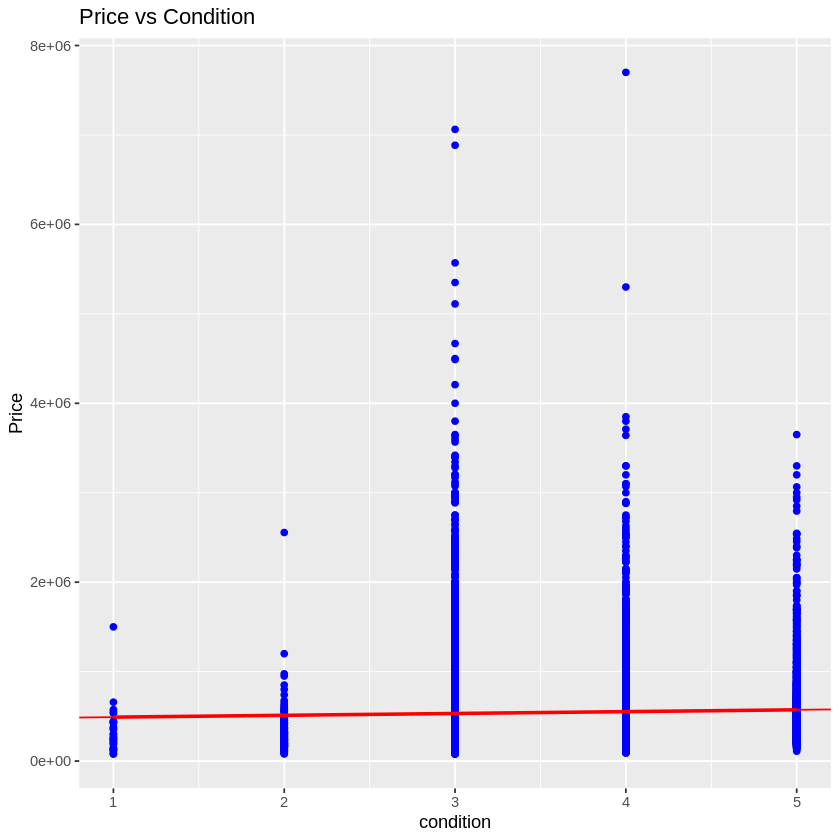

In [32]:
Plot_6 <- ggplot(data0, aes(x = condition, y = price)) +
          geom_point(col = "blue") +
          labs(title = "Price vs Condition", x = "condition", y = "Price") +
          stat_smooth(method = "lm", col = "red", se = FALSE) +
          geom_abline(slope = coef(lm(price ~ condition, data = data0))[2],
                      intercept = coef(lm(price ~ condition, data = data0))[1],
                      col = "red")

print(Plot_6)


From the plot between Condition and dependent variable price above, it appears the house with a higher grade of condition will have a better price.

In [33]:
 ##Lets see how Condition relates to sqft_living (variable of interest):
    cor(data0$sqft_living, data0$condition)
    anova(lm(sqft_living ~ condition, data=data0))

[1] -0.05870441

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
condition,1,62825184,62825184.3,74.73008,5.765962e-18
Residuals,21610,18167413220,840694.7,NA,NA


The correlation coefficient between'sqft_living' and 'condition' is about -0.0587. This negative correlation implies a weak inverse association between these two variables, implying that as the house's condition improves, the living space decreases slightly. The ANOVA findings show that the correlation between'sqft_living' and 'condition' is statistically significant. The p-value for the 'condition' variable is extremely low (5.77e-18), indicating that the link between'sqft_living' and 'condition' is unlikely to be due to chance.Overall, these findings reveal that, while there is a modest negative correlation between sqft_living and condition, the relationship is statistically significant, implying that a house's condition has an impact on its living space.

In [34]:
   ##Run regression:

    cse=function(reg) {
      rob=sqrt(diag(vcovHC(reg, type="HC1")))
      return(rob)
    }

    l1 = lm(price~sqft_living, data=data0)
    l2 = lm(price~sqft_living+grade, data=data0)
    l3 = lm(price~sqft_living+grade+yr_built, data=data0)
    l4 = lm(price~sqft_living+grade+yr_built+view, data=data0)
    l5 = lm(price~sqft_living+grade+yr_built+view+waterfront, data=data0)
    l6  = lm(price~sqft_living+grade+yr_built+view+waterfront+condition, data=data0)
    stargazer(l1, l2, l3,l4,l5, l6,se=list(NULL, NULL, NULL, NULL, NULL, NULL),
              column.labels=c("1", "2", "3", "4", "5", "6"),
              title="Price and Condition", type="text",
              star.cutoffs = c(0.05,0.01,0.001), df=FALSE, digits=3)


Price and Condition
                                                           Dependent variable:                                        
                    --------------------------------------------------------------------------------------------------
                                                                  price                                               
                          1               2               3                4                5                6        
                         (1)             (2)             (3)              (4)              (5)              (6)       
----------------------------------------------------------------------------------------------------------------------
sqft_living           280.629***     184.422***       178.033***       164.694***       164.293***       163.284***   
                       (1.936)         (2.869)         (2.652)          (2.604)          (2.546)          (2.550)     
                           

In [35]:
# Calculate confidence intervals for coefficients in the regression models
confint(l1)
confint(l2)
confint(l3)
confint(l4)
confint(l5)
confint(l6)


,2.5 %,97.5 %
(Intercept),-52233.1440,-34973.5611
sqft_living,276.8338,284.4249


,2.5 %,97.5 %
(Intercept),-624221.8480,-572092.130
sqft_living,178.7999,190.045
grade,94165.7692,102952.134


,2.5 %,97.5 %
(Intercept),6058182.3508,6502838.3512
sqft_living,172.8355,183.2301
grade,138902.8789,147510.6449
yr_built,-3774.1228,-3539.1380


,2.5 %,97.5 %
(Intercept),5356100.3981,5795125.2576
sqft_living,159.5899,169.7976
grade,130104.5009,138526.7319
yr_built,-3375.6329,-3143.1286
view,71543.7477,79866.0983


,2.5 %,97.5 %
(Intercept),5373875.4763,5803133.2166
sqft_living,159.3024,169.2831
grade,131402.1733,139638.3348
yr_built,-3382.8696,-3155.5362
view,43916.3434,52735.7315
waterfront,558790.1430,632805.4465


,2.5 %,97.5 %
(Intercept),5078397.0886,5546915.4308
sqft_living,158.2851,168.2823
grade,131884.4633,140121.1481
yr_built,-3274.7021,-3034.4115
view,43737.4763,52551.2307
waterfront,559275.1465,633236.4958
condition,9331.7811,19015.5009


We can see that each succeeding model incorporates more predictor variables, potentially improving the model's explanatory power. Model 6, which contains all predictor variables (square footage of living space, grade, year built, view, waterfront, and condition), may provide the most complete knowledge of house pricing because it considers a wide range of characteristics.
By comparing confidence intervals across models, we may determine how including or removing specific variables affects the estimated coefficients and overall model fit. In this analysis, all models have statistically significant predictors, indicating their importance in predicting housing prices. Furthermore, the relatively small confidence intervals imply a high level of precision in coefficient estimations, which improves model reliability. This comprehensive grasp of the correlations between house attributes and prices enables real estate investors to make informed decisions, appropriately valuing properties and developing effective investment plans.




In [36]:
# Model selection using AIC, BIC, and adjusted R-squared
aic <- AIC(l1, l2, l3, l4, l5, l6)
bic <- BIC(l1, l2, l3, l4, l5, l6)
adjusted_r_squared <- c(summary(l1)$adj.r.squared, summary(l2)$adj.r.squared,
                        summary(l3)$adj.r.squared, summary(l4)$adj.r.squared,
                        summary(l5)$adj.r.squared, summary(l6)$adj.r.squared)

# Print AIC, BIC, and adjusted R-squared values
print(aic)
print(bic)
print(adjusted_r_squared)


   df      AIC
l1  3 600513.0
l2  4 598662.8
l3  5 595230.7
l4  6 593996.8
l5  7 593025.0
l6  8 592994.1
   df      BIC
l1  3 600537.0
l2  4 598694.7
l3  5 595270.6
l4  6 594044.7
l5  7 593080.9
l6  8 593058.0
[1] 0.4928460 0.5344791 0.6028526 0.6249093 0.6414182 0.6419472


As we proceed from Model 1 to Model 6, both AIC and BIC decrease, indicating that adding more predictor variables improves model fit. Higher adjusted R-squared values imply better model fit. We see an increasing trend in adjusted R-squared values as we progress from Model 1 to Model 6, showing that the models explain more variance in the dependent variable as additional predictor variables are included. To summarize, the results indicate that Model 6, which incorporates all predictor variables (square footage of living space, grade, year built, view, waterfront, and condition), has the lowest AIC and BIC values and the best adjusted R-squared value of any of the models examined.This suggests that Model 6 provides the optimum balance of model complexity and explanatory power, making it the most appropriate model for accurately predicting housing values.





In [37]:
# Perform F-tests for overall significance of regression models
summary(l1)
summary(l2)
summary(l3)
summary(l4)
summary(l5)
summary(l6)

# Compare nested models using F-tests
anova(l1, l2)
anova(l2, l3)
anova(l3, l4)
anova(l4, l5)
anova(l5, l6)



Call:
lm(formula = price ~ sqft_living, data = data0)

Residuals:
     Min       1Q   Median       3Q      Max 
-1476118  -147471   -24061   106156  4362020 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -43603.353   4402.789  -9.904   <2e-16 ***
sqft_living    280.629      1.936 144.922   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 261500 on 21610 degrees of freedom
Multiple R-squared:  0.4929,	Adjusted R-squared:  0.4928 
F-statistic: 2.1e+04 on 1 and 21610 DF,  p-value: < 2.2e-16



Call:
lm(formula = price ~ sqft_living + grade, data = data0)

Residuals:
     Min       1Q   Median       3Q      Max 
-1065471  -138298   -25032   100451  4794600 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.982e+05  1.330e+04  -44.98   <2e-16 ***
sqft_living  1.844e+02  2.869e+00   64.29   <2e-16 ***
grade        9.856e+04  2.241e+03   43.97   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 250500 on 21609 degrees of freedom
Multiple R-squared:  0.5345,	Adjusted R-squared:  0.5345 
F-statistic: 1.241e+04 on 2 and 21609 DF,  p-value: < 2.2e-16



Call:
lm(formula = price ~ sqft_living + grade + yr_built, data = data0)

Residuals:
     Min       1Q   Median       3Q      Max 
-1246071  -121515   -12191    91622  4513129 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.281e+06  1.134e+05   55.37   <2e-16 ***
sqft_living  1.780e+02  2.652e+00   67.14   <2e-16 ***
grade        1.432e+05  2.196e+03   65.22   <2e-16 ***
yr_built    -3.657e+03  5.994e+01  -61.00   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 231400 on 21608 degrees of freedom
Multiple R-squared:  0.6029,	Adjusted R-squared:  0.6029 
F-statistic: 1.094e+04 on 3 and 21608 DF,  p-value: < 2.2e-16



Call:
lm(formula = price ~ sqft_living + grade + yr_built + view, data = data0)

Residuals:
     Min       1Q   Median       3Q      Max 
-1270833  -116768    -9154    92364  4527679 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.576e+06  1.120e+05   49.79   <2e-16 ***
sqft_living  1.647e+02  2.604e+00   63.25   <2e-16 ***
grade        1.343e+05  2.148e+03   62.52   <2e-16 ***
yr_built    -3.259e+03  5.931e+01  -54.95   <2e-16 ***
view         7.570e+04  2.123e+03   35.66   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 224900 on 21607 degrees of freedom
Multiple R-squared:  0.625,	Adjusted R-squared:  0.6249 
F-statistic:  9002 on 4 and 21607 DF,  p-value: < 2.2e-16



Call:
lm(formula = price ~ sqft_living + grade + yr_built + view + 
    waterfront, data = data0)

Residuals:
     Min       1Q   Median       3Q      Max 
-1311208  -114975    -8471    92056  4469204 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.589e+06  1.095e+05   51.04   <2e-16 ***
sqft_living  1.643e+02  2.546e+00   64.53   <2e-16 ***
grade        1.355e+05  2.101e+03   64.50   <2e-16 ***
yr_built    -3.269e+03  5.799e+01  -56.37   <2e-16 ***
view         4.833e+04  2.250e+03   21.48   <2e-16 ***
waterfront   5.958e+05  1.888e+04   31.56   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 219800 on 21606 degrees of freedom
Multiple R-squared:  0.6415,	Adjusted R-squared:  0.6414 
F-statistic:  7732 on 5 and 21606 DF,  p-value: < 2.2e-16



Call:
lm(formula = price ~ sqft_living + grade + yr_built + view + 
    waterfront + condition, data = data0)

Residuals:
     Min       1Q   Median       3Q      Max 
-1297903  -115286    -9047    91198  4475815 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5312656.26  119515.49  44.452  < 2e-16 ***
sqft_living     163.28       2.55  64.028  < 2e-16 ***
grade        136002.81    2101.12  64.729  < 2e-16 ***
yr_built      -3154.56      61.30 -51.464  < 2e-16 ***
view          48144.35    2248.32  21.413  < 2e-16 ***
waterfront   596255.82   18866.98  31.603  < 2e-16 ***
condition     14173.64    2470.24   5.738 9.72e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 219700 on 21605 degrees of freedom
Multiple R-squared:  0.642,	Adjusted R-squared:  0.6419 
F-statistic:  6459 on 6 and 21605 DF,  p-value: < 2.2e-16


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,21610,1.477224e+15,NA,NA,NA,NA
2,21609,1.355894e+15,1,1.213303e+14,1933.653,0


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,21609,1.355894e+15,NA,NA,NA,NA
2,21608,1.156693e+15,1,1.992008e+14,3721.239,0


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,21608,1.156693e+15,NA,NA,NA,NA
2,21607,1.092402e+15,1,6.429083e+13,1271.631,1.124261e-270


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,21607,1.092402e+15,NA,NA,NA,NA
2,21606,1.044274e+15,1,4.812819e+13,995.7712,1.042296e-213


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,21606,1.044274e+15,NA,NA,NA,NA
2,21605,1.042685e+15,1,1.588847e+12,32.92178,9.722522e-09


We use F-tests to determine the overall significance of each regression model and compare nested models to see if adding more variables significantly improves model fit.

1. **F-tests to determine overall significance**:
   - Each'summary()' output includes the F-statistic and p-value, which show the regression model's overall significance.
   - For example, in'summary(l1)', the F-statistic is 2.1e+04 with a p-value < 2.2e-16, indicating that the model with only the'sqft_living' variable is significant.

2. **Comparison of Nested Models**:
   -The 'anova()' method compares nested models by determining whether adding new variables significantly improves model fit.
   - For example, 'anova(l1, l2)' compares Model 1 (only'sqft_living') against Model 2 (both'sqft_living' and 'grade'). The p-value is < 2.2e-16, showing that including the 'grade' variable significantly improves model fit.
- Similarly, comparing subsequent models reveals whether the new variables are statistically significant.

The findings above demonstrate that each model is statistically significant, and that adding variables such as 'grade', 'yr_built', 'view', 'waterfront', and 'condition' considerably improves model performance, as proven by the low p-values in the F-tests.

In [38]:
#Joint Hypothesis Testing Using the Chi-squared Test
#Let's compare Model 5 and Model 6 using Chi- Square Test to find the better model .

    anova(l5, l6, test = 'Chisq')

,Res.Df,RSS,Df,Sum of Sq,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,21606,1.044274e+15,NA,NA,NA
2,21605,1.042685e+15,1,1.588847e+12,9.594252e-09


The Chi-squared test used to compare Model 5 and Model 6 indicates a significant difference between the two models. The test's p-value, which is nearly zero (9.594252e-09), provides strong evidence that there is a difference between the models. Furthermore, Model 6 has a lower residual sum of squares (RSS) than Model 5, indicating that it provides a better fit to the data. As a result, if we were to pick between the two models simply based on this test, Model 6 would be preferred since it provides more explanatory power and a better match to the observed data than Model 5.

## REPORT






# INTRODUCTION/BACKGROUND:

Worldwide economies rely heavily on the property market, which affects both the financial security of an individual and the stability of the economy as a whole. Comprehending the variables that influence housing costs is crucial for several stakeholders, such as homeowners, purchasers, vendors, legislators, and scholars. In this project, we create a regression model to find the factors that influence house values, delving into the intricate dynamics of the housing industry.

In the real estate industry, a wide range of factors influence house prices, such as the status of the economy, the supply and demand for housing, the location of the property, its features, and demographic trends. Articles like https://www.noradarealestate.com/blog/housing-market-trends/ , https://www.chicagofed.org/publications/profitwise-news-and-views/2018/determinants-of-housing-values-and-variations-in-home-prices-across-neighborhoods-in-cook-county , https://fortune.com/2023/11/19/housing-prices-predictions-market-outlook-recession/ , https://hub.jhu.edu/2023/08/29/affordable-housing-crisis/ , provide useful insights into housing market patterns, determinants of housing values, and forecasts for future market conditions. By exploring these materials, readers can obtain a better grasp of the elements that influence house prices, such as economic conditions, housing market dynamics, location characteristics, and affordability issues. These articles also provide evaluations of current market conditions, including predictions for housing price trends and debates about concerns such as the affordable housing crisis.

PREVIOUS WORK: Numerous research have used a variety of approaches and datasets to investigate the factors that influence property prices. Previous research has highlighted square footage, geographic qualities (e.g., proximity to amenities, school districts), property quality, and economic indicators (e.g., interest rates, employment rates) as important drivers of house prices. These studies provide useful insights into the issues that influence housing valuation and serve as the basis for our study. Building on previous research, we hope to provide further insights customized to the specific setting of King County, Washington, USA. Links for the referred research papers is at the end of this report.

DATA USED: This dataset includes house sale prices from King County, which includes Seattle. It covers properties sold between May 2014 and May 2015. Data source: https://data.kingcounty.gov/; also available on kaggle.com.The dataset has 21 attributes and 21613 observations. It represents a set of observational data that documents actual property sales in the region. The data collecting process was carried out by government third-party institutions in charge of documenting real estate transactions. This data may be collected for purposes such as keeping public records, assessing property taxes, and monitoring housing market changes.

QUESTIONS OF INTEREST:
The primary focus of the study is to analyze the relationship between house prices and square footage of living space. Specifically, we want to know whether living area size has a substantial impact on property prices in King County, Washington, USA. In addition, we look for additional characteristics, such as property grade, age, view, waterfront status, and condition, that may influence house price variations. By answering these questions, we hope to provide useful insights into the factors that influence house prices.

Hypothesis Question: Does the size of the living area affect property prices?

Ho: There is no correlation between living space size and home price.

Ha: Larger living space sizes often raise housing prices.

Dependent Variable: House price

Independent Variable:
Variable of interest: sqrt_lving - square feet of living space
Control variables: sqrt_lot, floors, # of bedrooms, # of bathrooms, waterfront&views.

## METHODS/RESULTS:


This dataset includes house sale prices from King County, which includes Seattle. It covers properties sold between May 2014 and May 2015. Data source: https://data.kingcounty.gov/; also available on kaggle.com.The dataset has 21 attributes and 21613 observations. The collection includes a variety of property-related information, such as square footage of living space, lot size, number of floors, bedrooms, baths, and markers for waterfront views.

EDA METHODS USED:The EDA process involved several key steps to understand the structure and characteristics of the dataset:
1. We began by obtaining descriptive statistics using the `stargazer` package. This provided us with an overview of the dataset's structure, including the data types, variable names, and summary statistics such as mean, median, and interquartile range.
2. We checked for missing values in the dataset to ensure data completeness. This involved identifying and addressing any NA values using functions like `is.na()` and `na.omit()`.
3. To understand the relationships between variables, we plotted a correlation heatmap using the `ggcorrplot` package. This allowed us to visualize the correlations between numeric variables and identify potential multicollinearity issues.
4. We looked for outliers in the dataset by producing boxplots for quantitative variables including square footage of living space, grade, view, condition, year built, and waterfront status. After detecting the outlier they were removed from the dataset.
5. We used t-tests to determine which variables were statistically significant predictors of the variable of interest (for example, living space size or property price). This entailed doing individual t-tests on each independent variable against the variable of interest and the dependent variable (home price).
6. Finally, we visualized trends over time by aggregating data on house prices and square footage of living space per year. This allowed us to observe how these variables changed over time and identify any patterns or trends.

In order to answer our question of interest the best analyses are correlation analysis, ANOVA (Analysis of Variance), model selection using the AIC and BIC (Akaike Information Criterion) models, hypothesis testing with F-tests, and joint hypothesis testing with the Chi-squared test.

CONCEPTS USED IN ANALYSIS: The relationship between the dependent variable (home price) and a number of independent factors (such as living space square footage, grade, year built, view, waterfront, and condition) was modeled using linear regression. To evaluate the direction and degree of correlations between pairs of continuous variables, correlation analysis was performed. ANOVA was employed to determine the significance of differences between group means. To select the best model, model selection was done using modified R-squared, BIC, and AIC. To compare nested models and ascertain the overall significance of regression models, hypothesis testing with F-tests was carried out. Finally, two models were compared using joint hypothesis testing with the Chi-squared test.To confirm the validity of the results, regression analyses were conducted with assumptions such as linearity, independence of errors, homoscedasticity, and normality of residuals.Visualizations such as scatter plots with regression lines, ANOVA tables, and boxplots were utilized to visually represent the correlations between factors and property prices. These images made it easier to analyze results and understand data patterns.

## CONCLUSION:

The study yielded numerous notable findings about the factors influencing housing prices. Variables like square footage of living space, grade, year built, view, waterfront, and condition were discovered to be statistically significant predictors of property prices. Furthermore, the complete model that included all of these variables produced the best fit to the data, indicating that taking into account several factors at the same time is critical for accurately projecting house prices.
Our final model is:
House price = 5,312,656 + 163.284 * sqft_living + 136,002.8 * grade - 3,154.557 * yr_built + 48,114.35 * view + 596,225.8 * waterfront + 14,173.64 * condition

According to the model, adding square footage increases the average property price by 163.284 dollars.

In conclusion, the study emphasized the significance of many factors in determining housing values. It emphasized the need of examining not only physical characteristics like size and condition, but also external factors like location and views.Future research could expand on this study by include variables such as neighborhood features, economic indicators, and housing market movements. Furthermore, investigating nonlinear correlations and interaction effects between variables may provide a better understanding of their impact on house values.

## REFERENCES:
https://www.researchgate.net/publication/371602053_Machine_Learning_Approach_for_House_Price_Prediction

https://www.mdpi.com/2220-9964/12/5/200

https://www.sciencedirect.com/science/article/abs/pii/S0957417423014835

https://www.mdpi.com/2073-445X/11/11/2100




































